# ANALISIS EXPLORATORIO DE DATOS

In [7]:
#Importamos las librerias necesarias
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandasql import sqldf
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import HistGradientBoostingRegressor

Datos tomados de : https://datos.cali.gov.co/dataset/estratificacion-socioeconomica-segun-estrato-por-barrio-en-cali-2015/resource/f492c39c-d980-4a97-9eaa-f00dc17e451a

TODO: Acomodar esta referencia 

In [8]:
estratos_barrios = pd.read_csv("./barrios_estratos_datos_libre_cali.csv")
estratos_barrios = estratos_barrios[["Barrio","Estrato moda"]]
estratos_barrios = estratos_barrios.rename(columns = {"Estrato moda": "Estrato_moda"})
estratos_barrios

,Barrio,Estrato_moda
0,Terrón Colorado,2
1,Vista Hermosa,1
2,Patio Bonito,1
3,Aguacatal,1
4,Santa Rita,6
...,...,...
364,Comuna 19,4
365,Comuna 20,1
366,Comuna 21,1
367,Comuna 22,6


In [9]:
def get_estrato_by_neighbourhood(neighbourhood):
    query = f"SELECT Estrato_moda FROM estratos_barrios WHERE Barrio Like '{neighbourhood}'"
    result = sqldf(query)
    return result.to_numpy()[0][0]

## CARGA DEL DATASET 

In [10]:
df1 = pd.read_excel("./appointment-ds.XLSX")
df2 = pd.read_excel("./sociodemographic-ds.XLSX")

### DATASET 1

Estos datos representan la información por paciente recuperada directamente desde la Fundación Valle de Lili y proporcionada por ellos. Aquí pueden detallarse los registros por cita de cada uno de estos pacientes y, finalmente, si asistió o no: 

In [11]:
#Tipos de datos de las variables del dataset 1
tipos_datos1 = df1.dtypes
print(tipos_datos1)

Fecha                                 datetime64[ns]
Hora                                          object
Hora.1                                         int64
Día de la semana                              object
Horario laboral \n(Si = 1; No = 0)             int64
Franja horaria                                object
Día festivo                                    int64
Num Dcto Modif                                 int64
Edad                                         float64
Fecha crea. cita                      datetime64[ns]
Tiempo entre creación cita y cita              int64
Agente Cita                                   object
Confirmado por email                           int64
Paciente NO ubicado                            int64
Confirmado FAMILIAR                            int64
Confirmado PACIENTE                            int64
Confirmado                                     int64
Antecedente No Show                            int64
Antecedente Cita Asistida                     

In [12]:
#Tipos de datos de las variables del dataset 2
tipos_datos2 = df2.dtypes
print(tipos_datos2)

Num Dcto Modif                       int64
Fecha de nacimiento         datetime64[ns]
Sexo                                object
Grupo étnico                        object
Estrato socioeconómico             float64
Comuna                             float64
Municipio de residencia             object
Ciudad de residencia                object
Barrio de residencia                object
Codigo aseguradora                  object
Seguridad social                    object
Régimen salud                       object
Cotizante o beneficiario            object
dtype: object


In [13]:
for i, col in enumerate(df1.columns):
    print(f'Columna {i + 1}: {col}')

Columna 1: Fecha
Columna 2: Hora
Columna 3: Hora.1
Columna 4: Día de la semana
Columna 5: Horario laboral 
(Si = 1; No = 0)
Columna 6: Franja horaria
Columna 7: Día festivo
Columna 8: Num Dcto Modif
Columna 9: Edad
Columna 10: Fecha crea. cita
Columna 11: Tiempo entre creación cita y cita
Columna 12: Agente Cita
Columna 13: Confirmado por email
Columna 14: Paciente NO ubicado
Columna 15: Confirmado FAMILIAR
Columna 16: Confirmado PACIENTE
Columna 17: Confirmado
Columna 18: Antecedente No Show
Columna 19: Antecedente Cita Asistida
Columna 20: Antecedente Cita Cancelada
Columna 21: Estudio Simple
Columna 22: Parte del Cuerpo
Columna 23: Anestesia
Columna 24: Reprogramación
Columna 25: Reprogramación por paciente
Columna 26: Cita adelantada
Columna 27: Aseguradora
Columna 28: Voluntario
Columna 29: RS / RC
Columna 30: Tipo de Cita VARIABLE OBJETIVO


In [14]:
df1.shape

(29169, 30)

### DATASET 2

En este conjunto de datos podemos encontrar la información sociodemográfica por paciente, de modo que se puede encontrar con mayor detalle el trasfondo que tiene cada paciente y así hacer un análisis exhaustivo a cada caso pertinente:

In [15]:
for i, col in enumerate(df2.columns):
    print(f'Columna {i + 1}: {col}')

Columna 1: Num Dcto Modif
Columna 2: Fecha de nacimiento
Columna 3: Sexo
Columna 4: Grupo étnico
Columna 5: Estrato socioeconómico
Columna 6: Comuna
Columna 7: Municipio de residencia
Columna 8: Ciudad de residencia
Columna 9: Barrio de residencia
Columna 10: Codigo aseguradora
Columna 11: Seguridad social
Columna 12: Régimen salud
Columna 13: Cotizante o beneficiario


In [16]:
df2.shape

(21793, 13)

In [17]:
#Cargamos el dataset 
df = pd.merge(df1,df2,on='Num Dcto Modif',how='inner')
df.head(50)

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,08:30:00,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16:05:00,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17:15:00,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11:25:00,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10:50:00,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16:05:00,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,07:20:00,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,07:20:00,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10:15:00,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14:20:00,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


### INFORMACION DE LAS COLUMNAS DEL DATASET

In [18]:
print(f"Número de columnas: {df.columns.size}")
df.columns

Número de columnas: 42


Index(['Fecha', 'Hora', 'Hora.1', 'Día de la semana',
       'Horario laboral \n(Si = 1; No = 0)', 'Franja horaria', 'Día festivo',
       'Num Dcto Modif', 'Edad', 'Fecha crea. cita',
       'Tiempo entre creación cita y cita', 'Agente Cita',
       'Confirmado por email', 'Paciente NO ubicado', 'Confirmado FAMILIAR',
       'Confirmado PACIENTE', 'Confirmado', 'Antecedente No Show',
       'Antecedente Cita Asistida', 'Antecedente Cita Cancelada',
       'Estudio Simple', 'Parte del Cuerpo', 'Anestesia', 'Reprogramación',
       'Reprogramación por paciente', 'Cita adelantada', 'Aseguradora',
       'Voluntario', 'RS / RC', 'Tipo de Cita VARIABLE OBJETIVO',
       'Fecha de nacimiento', 'Sexo', 'Grupo étnico', 'Estrato socioeconómico',
       'Comuna', 'Municipio de residencia', 'Ciudad de residencia',
       'Barrio de residencia', 'Codigo aseguradora', 'Seguridad social',
       'Régimen salud', 'Cotizante o beneficiario'],
      dtype='object')

In [19]:
df.shape

(29171, 42)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora                               29171 non-null  object        
 2   Hora.1                             29171 non-null  int64         
 3   Día de la semana                   29171 non-null  object        
 4   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 5   Franja horaria                     29171 non-null  object        
 6   Día festivo                        29171 non-null  int64         
 7   Num Dcto Modif                     29171 non-null  int64         
 8   Edad                               29171 non-null  float64       
 9   Fecha crea. cita                   29171 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita 

In [21]:
df.describe()

,Hora.1,Horario laboral \n(Si = 1; No = 0),Día festivo,Num Dcto Modif,Edad,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,Confirmado FAMILIAR,Confirmado PACIENTE,...,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada,Estrato socioeconómico,Comuna
count,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,...,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,24690.000000,24714.000000
mean,12.621988,0.623187,0.028864,10215.078948,49.255579,11.999794,0.013815,0.059957,0.101745,0.324158,...,0.066436,0.235679,0.057866,0.426725,0.052758,0.141922,0.075315,0.008776,3.579141,12.966942
std,4.517094,0.484596,0.167428,6289.421974,19.103048,16.493688,0.116725,0.237411,0.302318,0.468067,...,0.283789,0.590018,0.301085,0.494610,0.223554,0.348976,0.263903,0.093269,1.467013,6.242629
min,0.000000,0.000000,0.000000,1.000000,0.309589,-65.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,0.000000,0.000000,4682.000000,35.993151,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000
50%,13.000000,1.000000,0.000000,9905.000000,51.547945,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.000000
75%,16.000000,1.000000,0.000000,15565.500000,63.382192,15.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,17.000000
max,23.000000,1.000000,1.000000,21793.000000,98.586301,1309.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,9.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,22.000000


### VERIFICACION DE DATOS FALTANTES

In [22]:
df.head(50)

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,08:30:00,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16:05:00,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17:15:00,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11:25:00,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10:50:00,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16:05:00,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,07:20:00,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,07:20:00,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10:15:00,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14:20:00,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


### VERIFICACION DE DATOS FALTANTES 

In [23]:
df.isna().sum().sort_values() 

Fecha                                     0
Tipo de Cita VARIABLE OBJETIVO            0
Cita adelantada                           0
Reprogramación por paciente               0
Reprogramación                            0
Anestesia                                 0
Parte del Cuerpo                          0
Antecedente Cita Cancelada                0
Antecedente Cita Asistida                 0
Antecedente No Show                       0
Confirmado                                0
Confirmado PACIENTE                       0
Confirmado FAMILIAR                       0
Estudio Simple                            0
Confirmado por email                      0
Hora                                      0
Paciente NO ubicado                       0
Hora.1                                    0
Día de la semana                          0
Franja horaria                            0
Día festivo                               0
Horario laboral \n(Si = 1; No = 0)        0
Num Dcto Modif                  

Feature selection con wrapper
Matriz de correlación entre variables
Grid search para tuning

### Identificación de variables categóricas

En esta sección se identificarán que variables de nuestro dataset contiene valores categóricos. 

In [24]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Hora', 'Día de la semana', 'Franja horaria', 'Agente Cita',
       'Parte del Cuerpo', 'Aseguradora', 'Voluntario', 'RS / RC',
       'Tipo de Cita VARIABLE OBJETIVO', 'Sexo', 'Grupo étnico',
       'Municipio de residencia', 'Ciudad de residencia',
       'Barrio de residencia', 'Codigo aseguradora', 'Seguridad social',
       'Régimen salud', 'Cotizante o beneficiario'],
      dtype='object')

In [25]:
categorical_df = df[categorical_columns]

for column in categorical_df.columns:
    unique_values_size = categorical_df[column].unique().size
    print(f"Número de valores únicos en '{column}': {unique_values_size}")

Número de valores únicos en 'Hora': 183
Número de valores únicos en 'Día de la semana': 7
Número de valores únicos en 'Franja horaria': 4
Número de valores únicos en 'Agente Cita': 34
Número de valores únicos en 'Parte del Cuerpo': 10
Número de valores únicos en 'Aseguradora': 11
Número de valores únicos en 'Voluntario': 3
Número de valores únicos en 'RS / RC': 4
Número de valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': 3
Número de valores únicos en 'Sexo': 3
Número de valores únicos en 'Grupo étnico': 9
Número de valores únicos en 'Municipio de residencia': 31
Número de valores únicos en 'Ciudad de residencia': 200
Número de valores únicos en 'Barrio de residencia': 450
Número de valores únicos en 'Codigo aseguradora': 252
Número de valores únicos en 'Seguridad social': 218
Número de valores únicos en 'Régimen salud': 18
Número de valores únicos en 'Cotizante o beneficiario': 19


In [26]:
target_unique_values = categorical_df["Tipo de Cita VARIABLE OBJETIVO"].unique()
print(f"Valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': {target_unique_values}")


Valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': ['ATENDIDA' 'CANCELADA' 'ASIGNADA']


### DISTRIBUCION DE VARIABLES NÚMERICAS

Acá veremos la distribución de las variables númericas de nuestro dataset

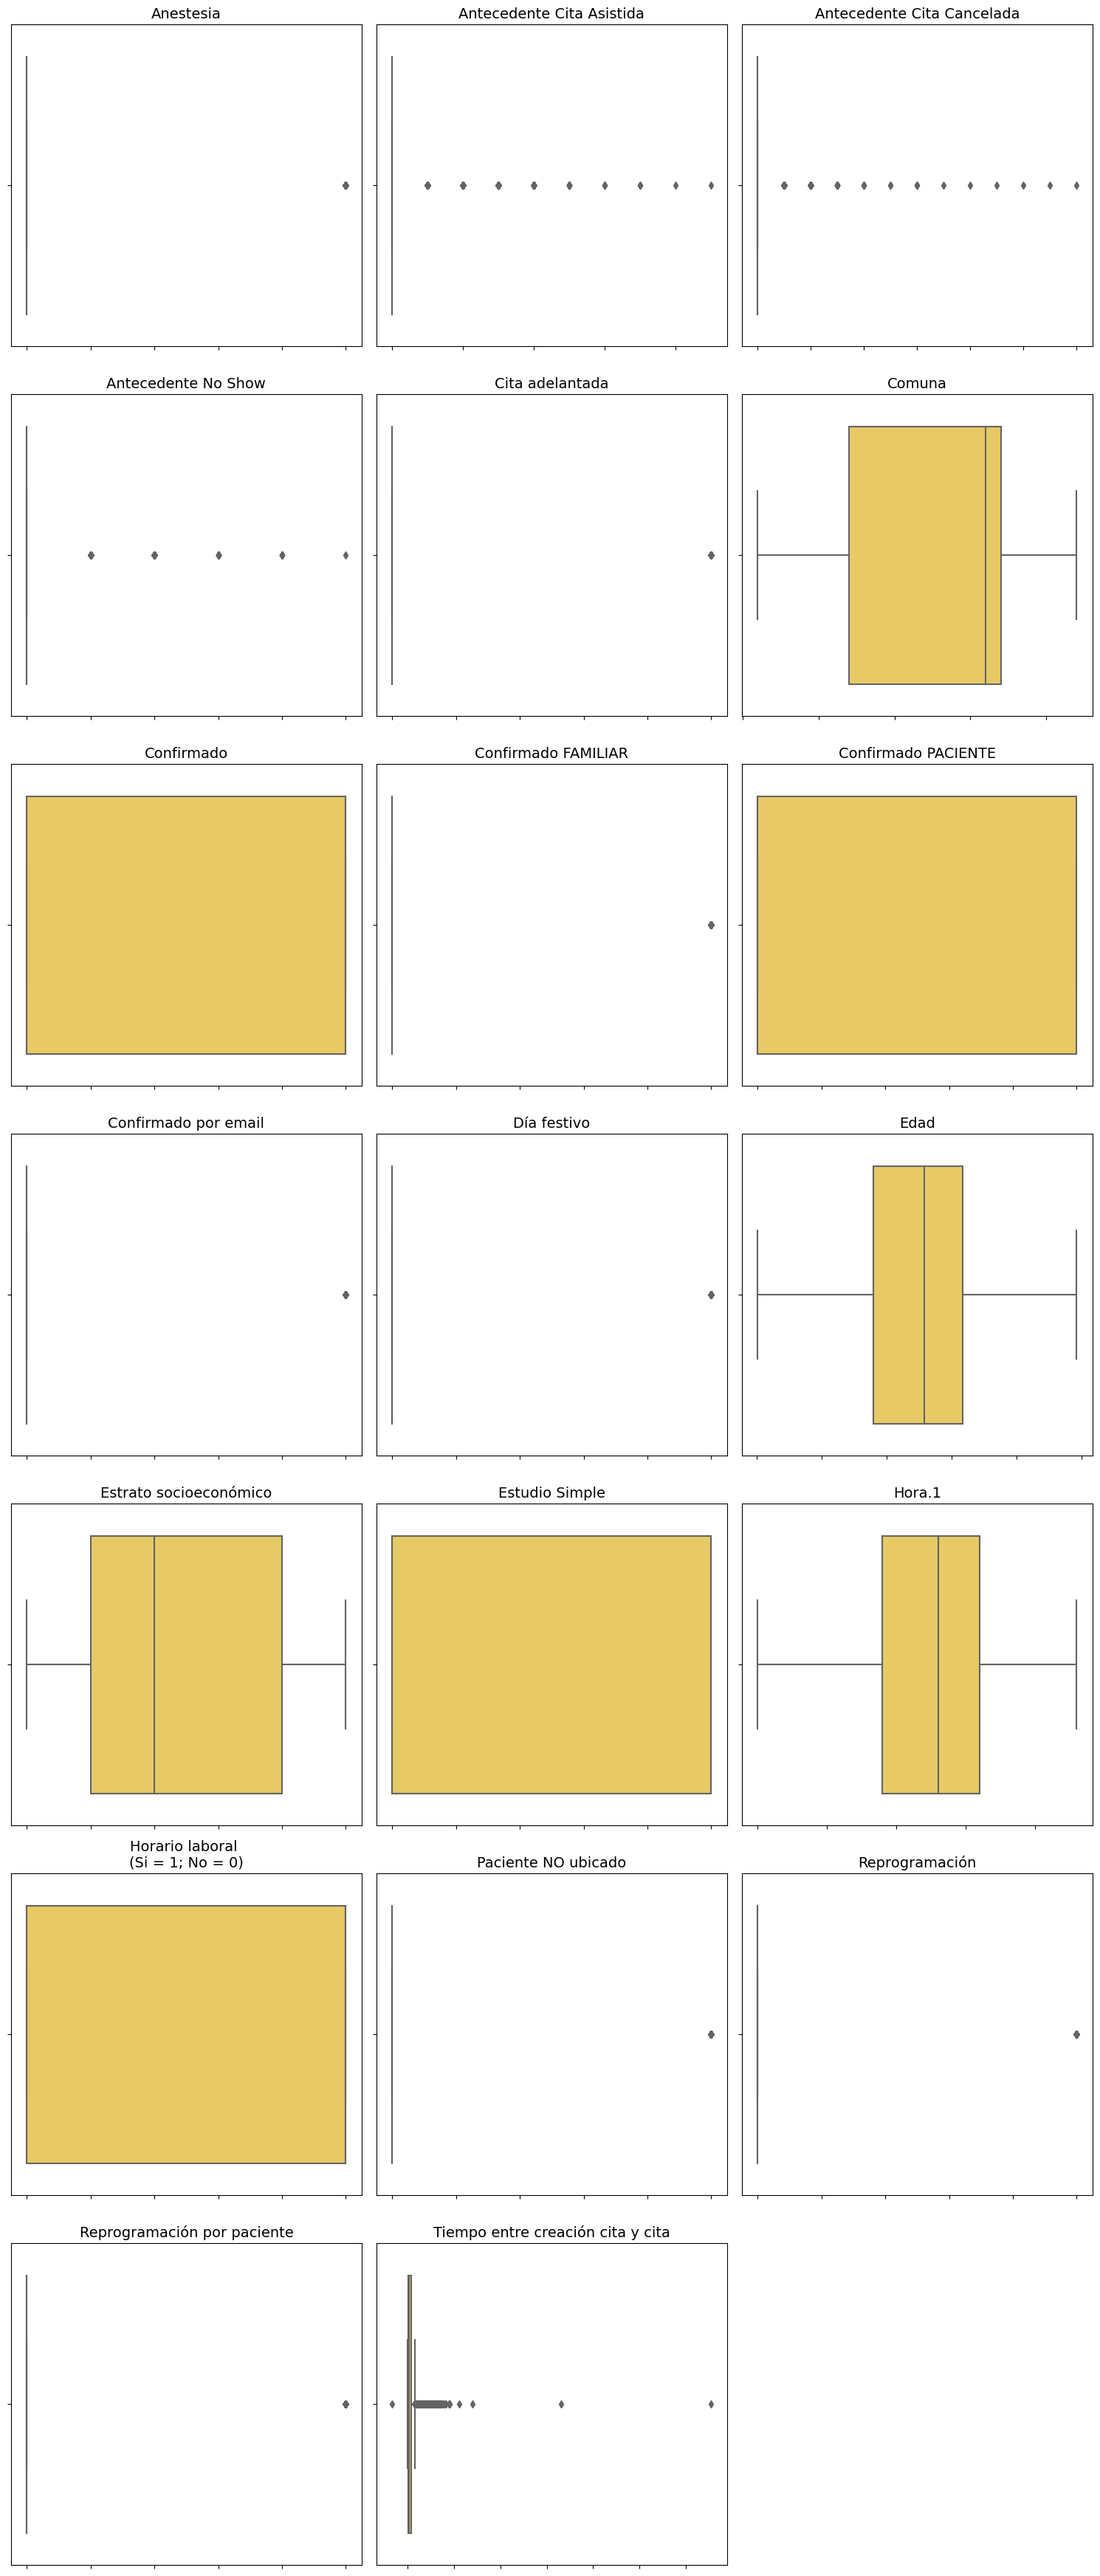

In [27]:
# Define columns to include
cols_to_include = [col for col in df.columns.difference(categorical_columns)  if df[col].dtype in [np.float64, np.int64]]
cols_to_include.remove("Num Dcto Modif")
# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for idx, atr in enumerate(cols_to_include):
    ax = axes.flat[idx]
    sns.boxplot(x=df[atr], color='#FCD451', ax=ax)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])

# Remove excess subplots
for idx in range(len(cols_to_include), n_rows * n_cols):
    fig.delaxes(axes.flat[idx])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


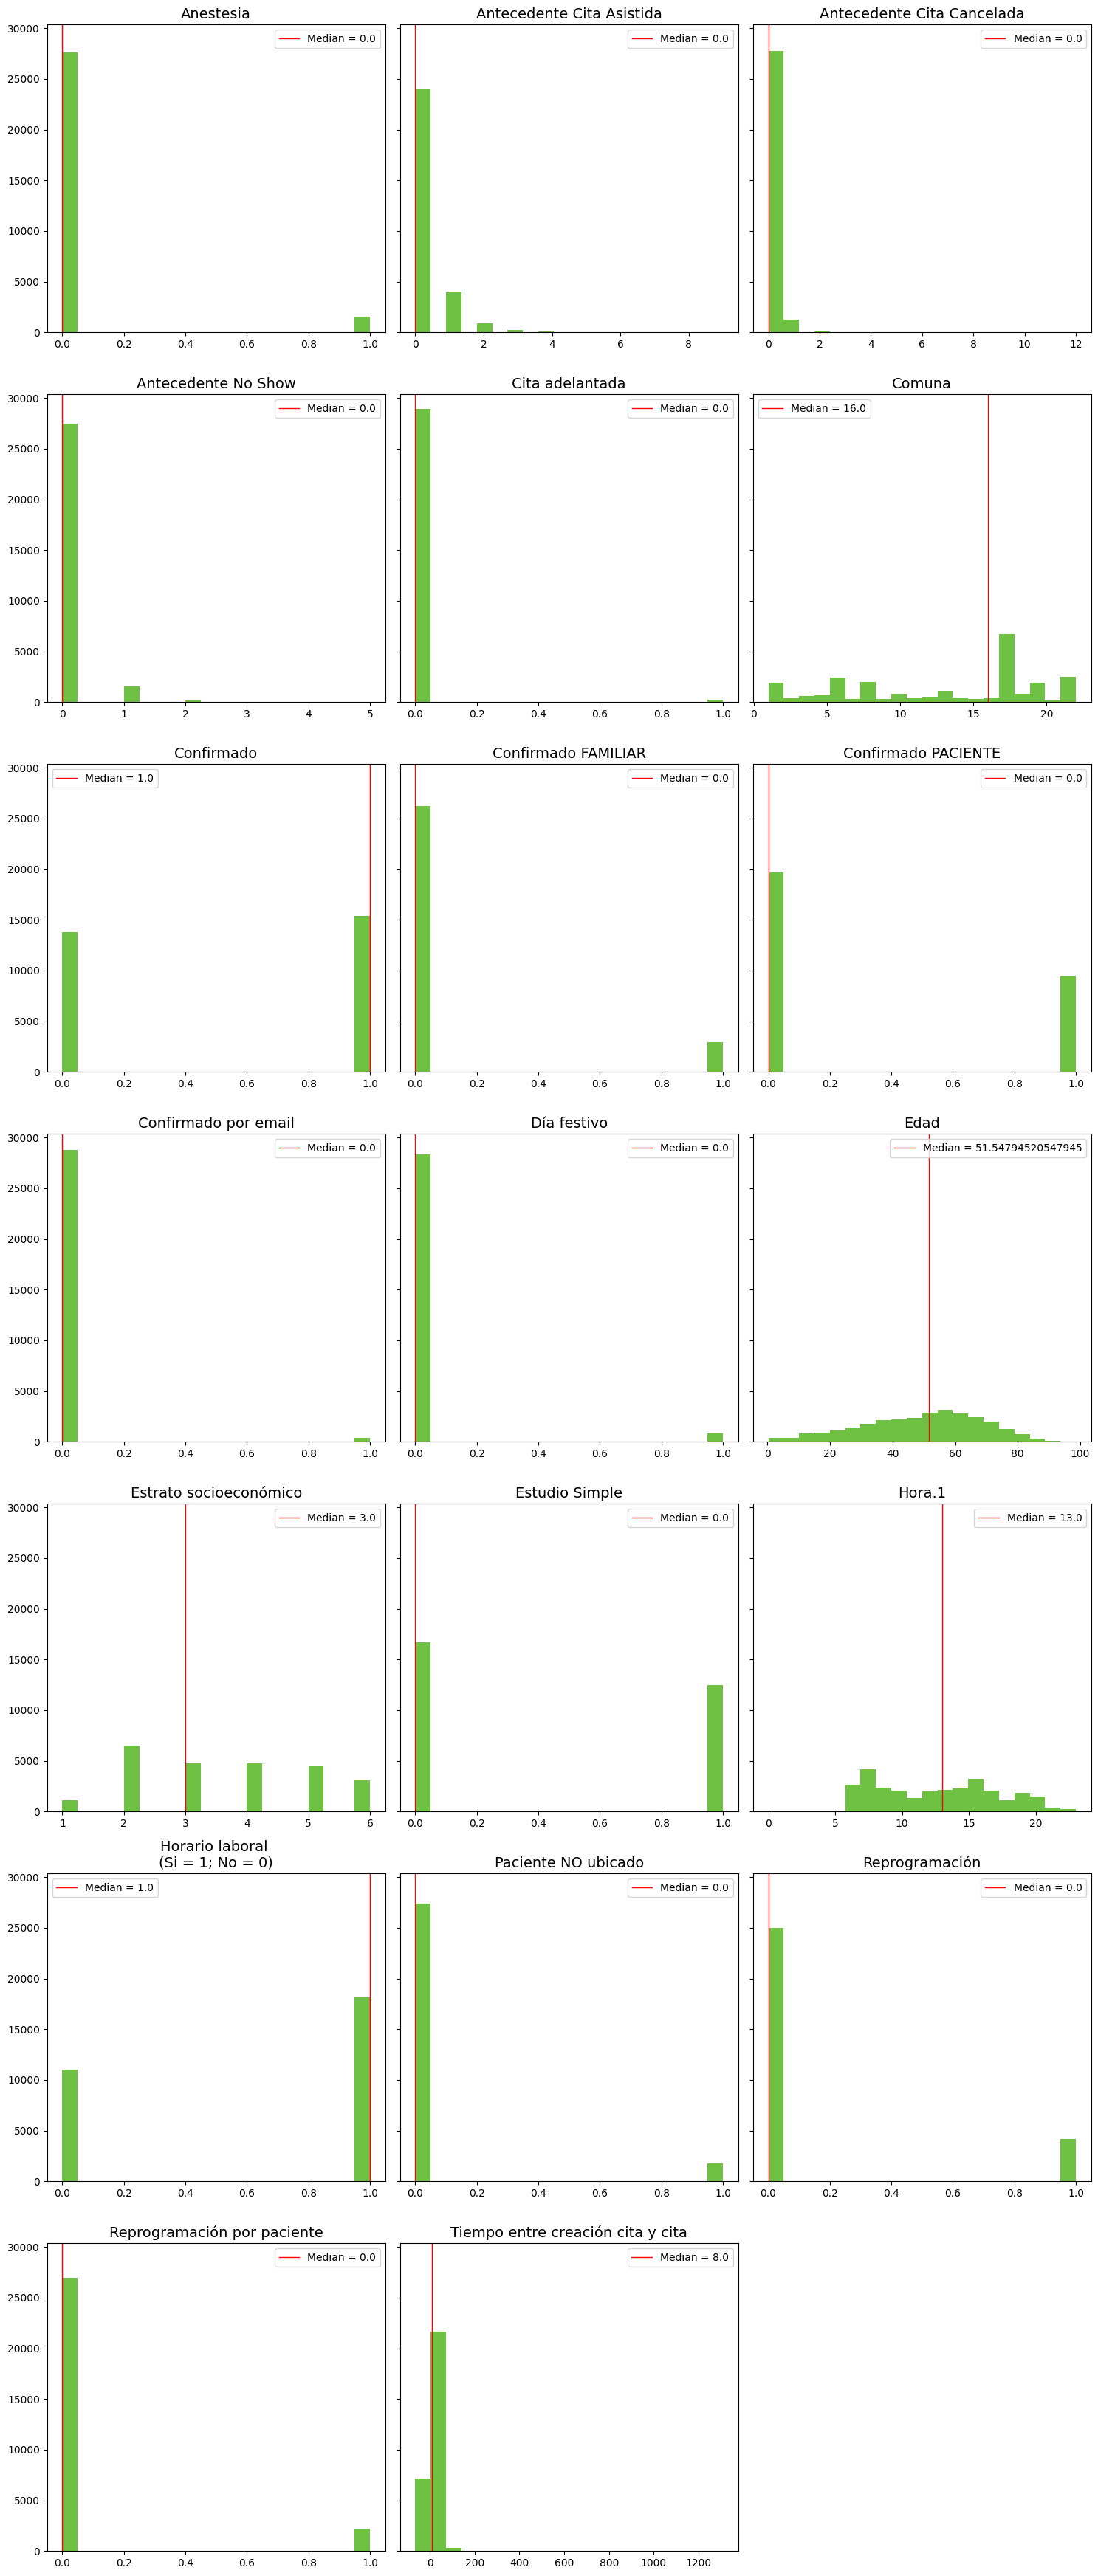

In [28]:
#cols_to_include = df.select_dtypes(include=np.number).columns

# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for ax, atr in zip(axes.flat, cols_to_include):
    ax.hist(df[atr], color='#6FC143', bins=20)
    ax.axvline(df[atr].median(), color='red', label=f"Median = {df[atr].median()}", linewidth=1)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='')
    ax.legend()

# Remove last two empty subplot
fig.delaxes(axes[-1, -1])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### DISTRIBUCION DE LA VARIABLE OBJETIVO

In [29]:
appoiment_show = [value for value in df["Tipo de Cita VARIABLE OBJETIVO"] if value == "ATENDIDA"] # registros en donde si asistio a la cita
appoiment_no_show = [value for value in df["Tipo de Cita VARIABLE OBJETIVO"] if value != "ATENDIDA"] # registros en donde no asistio a la cita

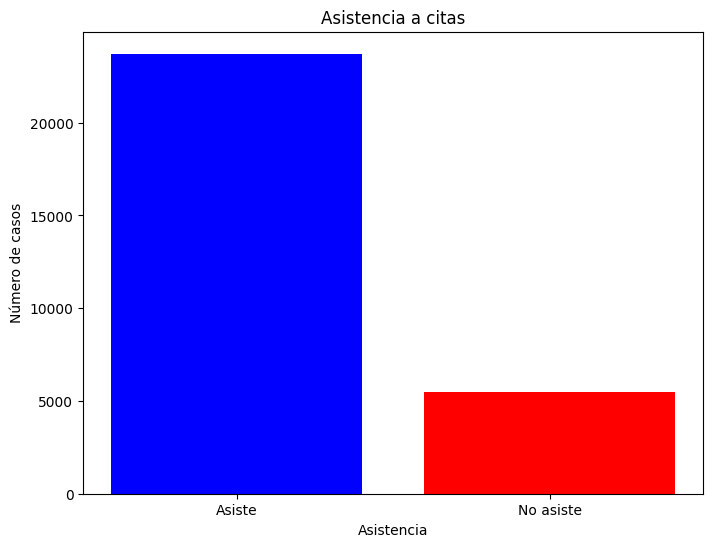

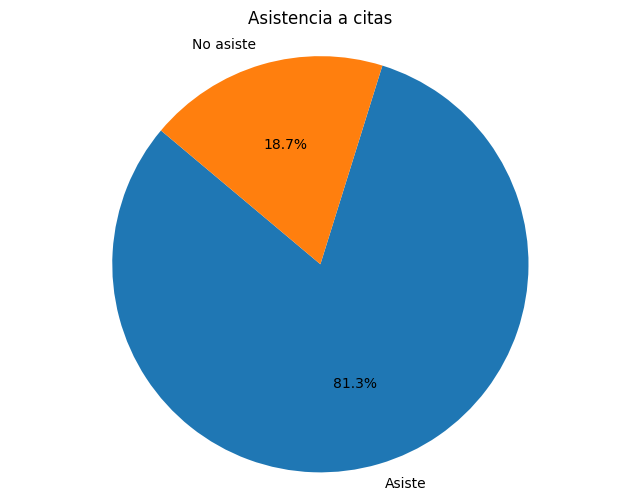

In [30]:
labels = ["Asiste","No asiste"]
amount = [len(appoiment_show), len(appoiment_no_show)]

plt.figure(figsize=(8, 6))
plt.bar(labels, amount, color=['blue', 'red'])
plt.title('Asistencia a citas')
plt.xlabel('Asistencia')
plt.ylabel('Número de casos')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Asistencia a citas')
plt.show()



### CONCLUSIONES DEL ANALISIS EXPLORATORIO DE DATOS

Después de realizar en análisis exploratorio de datos , se pueden llegar a las siguientes conclusiones: 

- El dataset cuenta con una gran mayoría de  variables categóricas, lo cual implicará plantear estrategias para categorizar cada una

- Entre los datos encontramos que la mayoría de pacientes asisten a la cita y gracias a se podrán evaluar los factores que influyeron en que los pacientes si asistieran a la cita. 

- El dataset cuentan con una buena calidad, al poseer muy pocos datos faltantes. Lo que hará que su respectiva limpieza y/o imputación  no requiera mucho trabajo. 

- Algunos atributos numéricos del dataset no cuentan con una distribución normal, según las graficas; eso va a requerir evaluar la relevancia de esos atributos a la hora de preparar los datos. 

- Los atributos categóricos que fueron identificados son muy buenos candidatos para la construcción del modelo , mientras que los numéricos no tanto; sin embargo, aún se requiere evaluar su relación con la variable objetivo para así definir su relevancia a la hora de crear el modelo. 

<hr>

## PREPROCESAMIENTO DE DATOS

### Selección de atributos

In [31]:
feature_df = df.drop(["Tipo de Cita VARIABLE OBJETIVO", "Hora"],axis=1)
target_feature = df["Tipo de Cita VARIABLE OBJETIVO"]

feature_df.head(50)

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,62,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,0,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,15,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,0,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,4,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,0,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,4,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,9,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,5,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,0,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


In [32]:
feature_df.tail(50)

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
29121,2020-07-28,13,martes,1,12 - 18,0,21745,12.936986,2020-07-21,7,...,NaN,2.0,18.0,CAUCA,POPAYÁN,POPAYÁN,1000002509,Emssanar Eps S.A.S. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
29122,2020-07-28,16,martes,1,12 - 18,0,21746,36.372603,2020-07-10,18,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000345,Compañia Seguros Bolivar S.A.,Aseguradoras,Ampar plan volun sal
29123,2020-07-28,14,martes,1,12 - 18,0,21747,15.956164,2020-07-14,14,...,NaN,3.0,3.0,VALLE DEL CAUCA,SAN PEDRO,SAN PEDRO,1000003039,Servicio Occid. De Salud Pbs Onco,Entid Prom De Salud Contribut,Cat. A: Beneficiario
29124,2020-07-28,17,martes,1,12 - 18,0,21748,56.534247,2020-07-22,6,...,Otro,4.0,17.0,VALLE DEL CAUCA,CALI,LILI,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,Sin régimen
29125,2020-07-28,17,martes,1,12 - 18,0,21749,79.147945,2020-07-14,14,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,SANTA MONICA,1000002598,Eps Suramericana S.A Pgp Oncologia,Entid Prom De Salud Contribut,Cat C: Cotizante
29126,2020-07-29,12,miércoles,1,12 - 18,0,21750,37.301370,2020-07-28,1,...,NaN,1.0,14.0,VALLE DEL CAUCA,CALI,LAS QUINTAS DE DON SIMON,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
29127,2020-07-29,14,miércoles,1,12 - 18,0,21751,80.542466,2020-07-21,8,...,Mestizo,2.0,15.0,VALLE DEL CAUCA,CALI,CRISTOBAL COLON,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
29128,2020-07-29,14,miércoles,1,12 - 18,0,21752,74.887671,2020-07-21,8,...,NaN,5.0,19.0,VALLE DEL CAUCA,CALI,EL LIDO,1000000198,Nueva Eps S.A. Oncologia Rc,Entid Prom De Salud Contribut,Cat A: Cotizante
29129,2020-07-29,16,miércoles,1,12 - 18,0,21753,35.646575,2020-07-21,8,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,Sin régimen
29130,2020-07-29,11,miércoles,1,6 - 12,0,21754,83.232877,2020-03-06,145,...,NaN,3.0,5.0,VALLE DEL CAUCA,TULUÁ,TULUA,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal


In [33]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29171 entries, 0 to 29170
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora.1                             29171 non-null  int64         
 2   Día de la semana                   29171 non-null  object        
 3   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 4   Franja horaria                     29171 non-null  object        
 5   Día festivo                        29171 non-null  int64         
 6   Num Dcto Modif                     29171 non-null  int64         
 7   Edad                               29171 non-null  float64       
 8   Fecha crea. cita                   29171 non-null  datetime64[ns]
 9   Tiempo entre creación cita y cita  29171 non-null  int64         
 10  Agente Cita                       

In [34]:
feature_df.columns.size

40

In [35]:
target_feature.head()

0    ATENDIDA
1    ATENDIDA
2    ATENDIDA
3    ATENDIDA
4    ATENDIDA
Name: Tipo de Cita VARIABLE OBJETIVO, dtype: object

### Tratamiento de las variables categóricas

#### • Fechas

In [36]:
date_columns = feature_df.select_dtypes(include="datetime").columns
date_columns

Index(['Fecha', 'Fecha crea. cita', 'Fecha de nacimiento'], dtype='object')

In [55]:
date_columns = feature_df.select_dtypes(include="datetime").columns

for column in date_columns:
    feature_df[column] = pd.to_datetime(feature_df[column]).astype('int64') // 10**9 

feature_df.head()

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,1514851200,8,martes,1,6 - 12,0,1,2.208219,1509494400,62,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,1514851200,16,martes,1,12 - 18,0,2,54.128767,1514851200,0,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,1514851200,17,martes,1,12 - 18,0,3,17.309589,1513555200,15,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,1514851200,11,martes,1,6 - 12,0,4,55.586301,1514851200,0,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,1514851200,10,martes,1,6 - 12,0,5,29.641096,1514505600,4,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura


#### • Variables categóricas nominales representativas
Entiendase variables categóricas nominales representativas aquellas que, sin tener un orden en particular, continenen una gran cantidad de categorias u opciones que dificultan la codificación del dataset y por tanto todo el preprocesaminto de datos. En este caso particular son:
- 'Municipio de residencia'
- 'Barrio de residencia'
- 'Ciudad de residencia'

In [56]:
# Completamos los missing values en 'Barrio de residencia' con los valores de 'Ciudad de residencia'

nh = feature_df["Barrio de residencia"]
city = feature_df["Ciudad de residencia"]

feature_df["Barrio de residencia"] = nh.fillna(city)

feature_df["Barrio de residencia"].isna().sum()

163

##### Codificación de variables categóricas nominales representativas
Para este caso, la forma en que se codificarán estas variables será mediante la transformación de las mismas en las distancias físicas entre estas y la Fundación Valle de Lili a través del siguiente algoritmo:

In [60]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Function to get coordinates from location string
def get_coordinates(location):
    geolocator = Nominatim(user_agent="geo_distance_calculator")
    location = geolocator.geocode(location)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Function to calculate distance between two locations
def calculate_distance(reference_coords, location_coords):
    return geodesic(reference_coords, location_coords).kilometers

# Function to transform location names to distances
def transform_to_distances(df, reference_point):
    nh_col = "Barrio de residencia"
    city_col = "Ciudad de residencia"
    # Get coordinates of reference point
    reference_coords = get_coordinates(reference_point)
    if reference_coords is None:
        print("Failed to retrieve coordinates for the reference point.")
        return None
    
    # Iterate over rows in DataFrame
    for index, row in df.iterrows():
        # Concatenate city, state, and neighborhood into a single location string
        location = f"{row[nh_col]}, {row[city_col]}"
        
        # Get coordinates of location
        location_coords = get_coordinates(location)
        if location_coords is None:
            print(f"Failed to retrieve coordinates for {location}.")
            continue
        
        # Calculate distance from location to reference point
        distance = calculate_distance(reference_coords, location_coords)
        
        # Replace location name with distance
        df.at[index, 'distance_to_point'] = distance
    
    return df

In [61]:
# Reference point for distance calculation
reference_point = "Cra. 98 #18-49, Cali, Valle del Cauca" # The reference point address (Fundación Valle de Lili, Cali, Colombia)

# Transform location names to distances
feature_df = transform_to_distances(feature_df, reference_point)

print(df)

Failed to retrieve coordinates for PETECUY PRIMERA ETAPA, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for BARRIO SAN CARLOS, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for LA HACIENDA, JAMUNDI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDIN, CALI.
Failed to retrieve coordinates for URBANIZACION CIUDAD JARDI

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=PARCELACIONES+PANCE%2C+CALI&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000026E15EEE490>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [49]:
from sklearn.preprocessing import LabelEncoder

encoded_feature_df = pd.get_dummies(feature_df)
encoded_target_feature = LabelEncoder().fit_transform(target_feature)
encoded_feature_df.head()

,Fecha,Hora.1,Horario laboral \n(Si = 1; No = 0),Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,...,Cotizante o beneficiario_Cat. A: Beneficiario,Cotizante o beneficiario_Cat. C: Beneficiario,Cotizante o beneficiario_Excepcion beneficia,Cotizante o beneficiario_Excepcion cotizante,Cotizante o beneficiario_No aplica cobertura,Cotizante o beneficiario_Sin régimen,Cotizante o beneficiario_Subsidiado Nivel 1,Cotizante o beneficiario_Subsidiado Nivel 2,Cotizante o beneficiario_Vinculado Nivel 1,Cotizante o beneficiario_Vinculador Nivel 0
0,1514851200,8,1,0,1,2.208219,1509494400,62,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1514851200,16,1,0,2,54.128767,1514851200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1514851200,17,1,0,3,17.309589,1513555200,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1514851200,11,1,0,4,55.586301,1514851200,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1514851200,10,1,0,5,29.641096,1514505600,4,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
encoded_feature_df.tail()

,Fecha,Hora.1,Horario laboral \n(Si = 1; No = 0),Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,...,Cotizante o beneficiario_Cat. A: Beneficiario,Cotizante o beneficiario_Cat. C: Beneficiario,Cotizante o beneficiario_Excepcion beneficia,Cotizante o beneficiario_Excepcion cotizante,Cotizante o beneficiario_No aplica cobertura,Cotizante o beneficiario_Sin régimen,Cotizante o beneficiario_Subsidiado Nivel 1,Cotizante o beneficiario_Subsidiado Nivel 2,Cotizante o beneficiario_Vinculado Nivel 1,Cotizante o beneficiario_Vinculador Nivel 0
29166,1596153600,16,1,0,21789,53.021918,1595462400,8,0,0,...,0,0,0,0,0,0,0,0,0,0
29167,1596153600,17,1,0,21790,41.484932,1595289600,10,0,0,...,0,0,0,0,0,0,0,0,0,0
29168,1596153600,17,1,0,21791,49.057534,1595808000,4,0,1,...,0,0,0,0,1,0,0,0,0,0
29169,1596153600,17,1,0,21792,34.104110,1596067200,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29170,1596153600,18,0,0,21793,61.071233,1595548800,7,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
encoded_feature_df.columns.size

1285

In [52]:
encoded_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29171 entries, 0 to 29170
Columns: 1285 entries, Fecha to Cotizante o beneficiario_Vinculador Nivel 0
dtypes: float64(3), int64(21), uint8(1261)
memory usage: 40.6 MB


In [53]:
encoded_target_feature[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
# Sequential Forward Floating Selection (sffs)

sffs = SFS(HistGradientBoostingRegressor(),
         k_features=(len(encoded_feature_df.columns)),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(encoded_feature_df, encoded_target_feature)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=0, estimator=HistGradientBoostingRegressor(),
                          floating=True, k_features=1285)

### ANALISIS DE CORRELACION

In [ ]:
df_encoded = df.drop(categorical_values, axis=1)
df_encoded.describe()

,Fecha,Hora.1,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Fecha de nacimiento,...,Confirmado PACIENTE_encoded,Confirmado_encoded,Estudio Simple_encoded,Anestesia_encoded,Reprogramación_encoded,Reprogramación por paciente_encoded,Cita adelantada_encoded,Voluntario_encoded,Tipo de Cita VARIABLE OBJETIVO_encoded,Sexo_encoded
count,29171,29171.000000,29171.000000,29171.000000,29171,29171.000000,29171.000000,29171.000000,29171.000000,29141,...,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000
mean,2019-04-05 11:58:11.892632832,12.621988,10215.078948,49.255579,2019-03-24 11:58:29.663707136,11.999794,0.066436,0.235679,0.057866,1970-01-11 23:27:32.064102124,...,0.324158,0.526413,0.426725,0.052758,0.141922,0.075315,0.008776,0.578280,1.036543,0.434713
min,2018-01-02 00:00:00,0.000000,1.000000,0.309589,2015-03-04 00:00:00,-65.000000,0.000000,0.000000,0.000000,1920-03-14 00:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-08-30 00:00:00,9.000000,4682.000000,35.993151,2018-08-23 00:00:00,4.000000,0.000000,0.000000,0.000000,1955-12-13 00:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2019-04-07 00:00:00,13.000000,9905.000000,51.547945,2019-03-26 00:00:00,8.000000,0.000000,0.000000,0.000000,1967-10-14 00:00:00,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2019-11-03 00:00:00,16.000000,15565.500000,63.382192,2019-10-17 00:00:00,15.000000,0.000000,0.000000,0.000000,1983-05-06 00:00:00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2020-07-31 00:00:00,23.000000,21793.000000,98.586301,2020-07-30 00:00:00,1309.000000,5.000000,9.000000,12.000000,2019-12-26 00:00:00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
std,NaN,4.517094,6289.421974,19.103048,NaN,16.493688,0.283789,0.590018,0.301085,NaN,...,0.468067,0.499310,0.494610,0.223554,0.348976,0.263903,0.093269,0.516044,0.430936,0.497798


<AxesSubplot: >

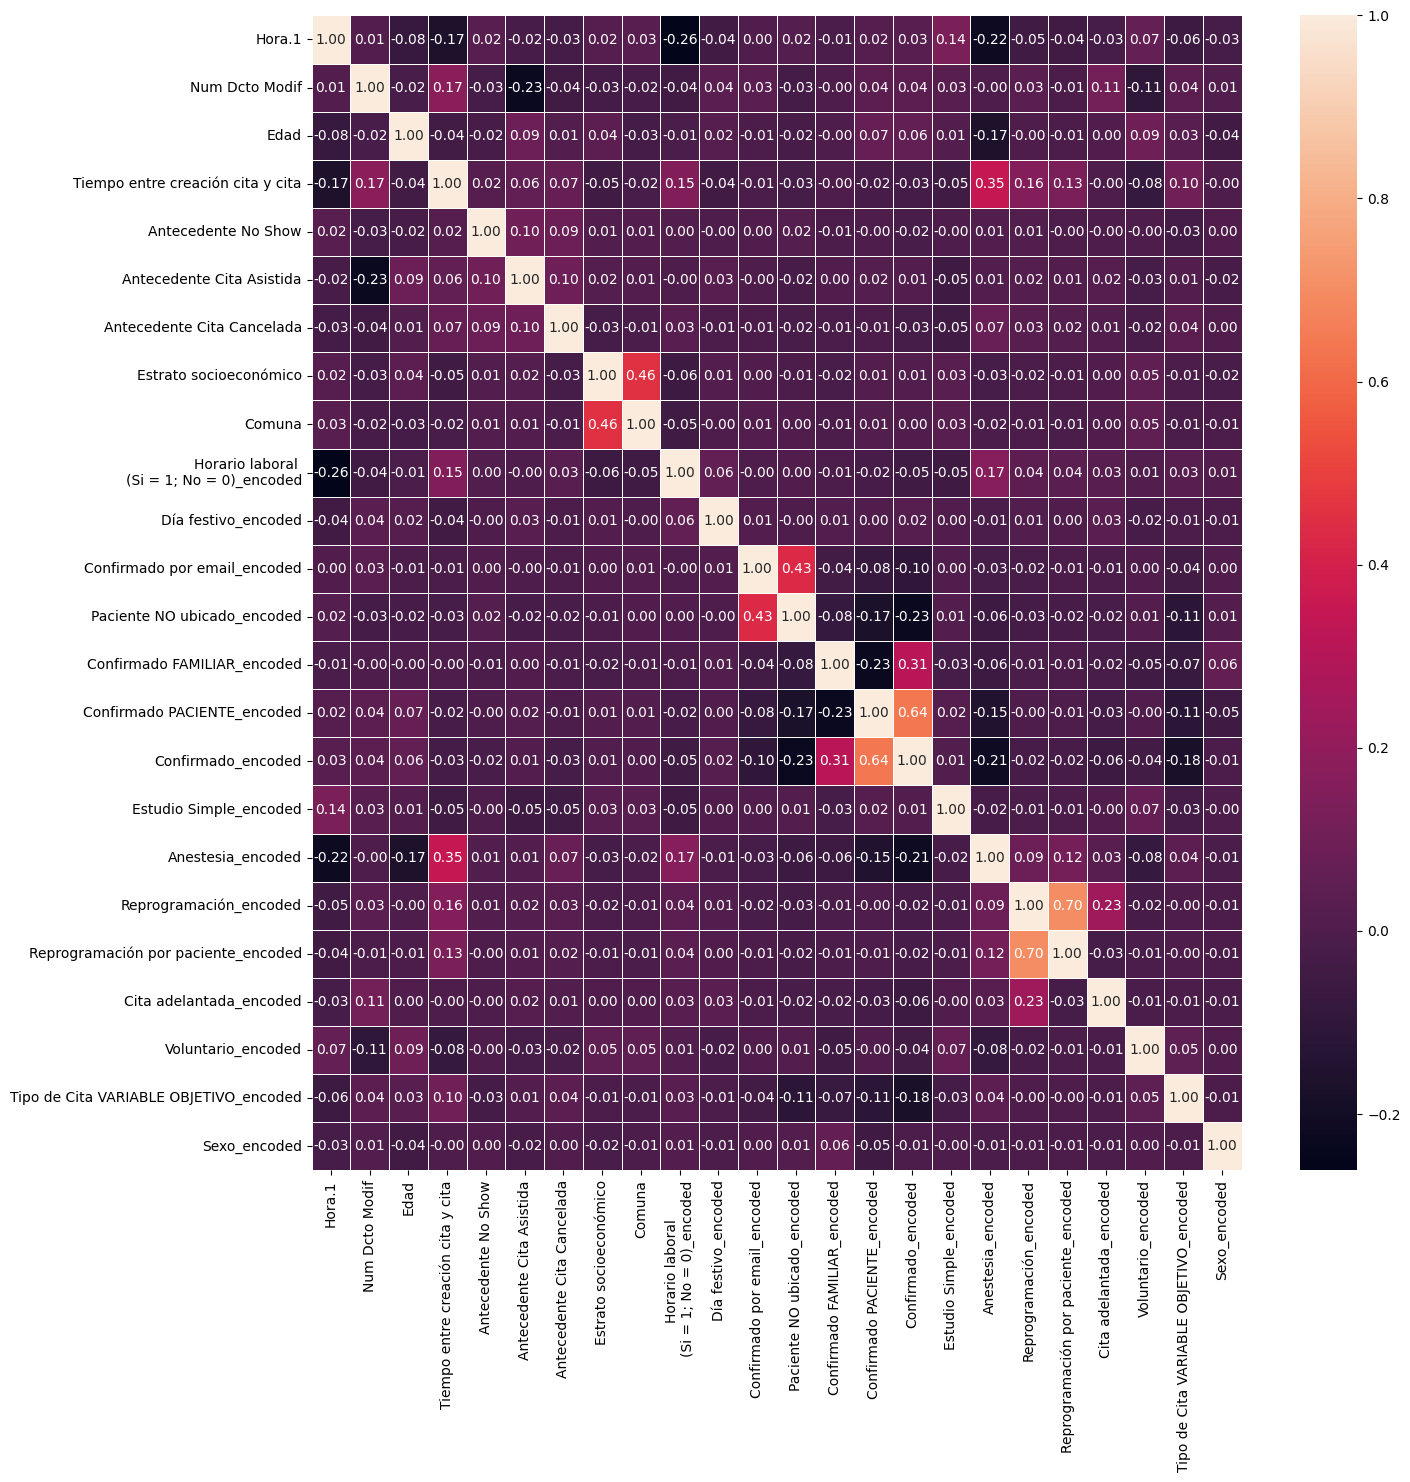

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.corr(method='pearson',numeric_only=True),annot=True,linewidth=0.5,fmt='0.2f')

## TRATAMIENDO DE DATOS FALTANTES

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Fecha                                      29171 non-null  datetime64[ns]
 1   Hora                                       29171 non-null  object        
 2   Hora.1                                     29171 non-null  int64         
 3   Día de la semana                           29171 non-null  object        
 4   Franja horaria                             29171 non-null  object        
 5   Num Dcto Modif                             29171 non-null  int64         
 6   Edad                                       29171 non-null  float64       
 7   Fecha crea. cita                           29171 non-null  datetime64[ns]
 8   Tiempo entre creación cita y cita          29171 non-null  int64         
 9   Agente Cita      

### IMPUTACION DE DATOS

In [ ]:
df_encoded.head()

,Fecha,Hora,Hora.1,Día de la semana,Franja horaria,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Agente Cita,...,Confirmado PACIENTE_encoded,Confirmado_encoded,Estudio Simple_encoded,Anestesia_encoded,Reprogramación_encoded,Reprogramación por paciente_encoded,Cita adelantada_encoded,Voluntario_encoded,Tipo de Cita VARIABLE OBJETIVO_encoded,Sexo_encoded
0,2018-01-02,08:30:00,8,martes,6 - 12,1,2.208219,2017-11-01,62,PGRISALES,...,0,0,1,1,1,1,0,0,1,1
1,2018-01-02,16:05:00,16,martes,12 - 18,2,54.128767,2018-01-02,0,PGRISALES,...,0,0,1,0,0,0,0,1,1,0
2,2018-01-02,17:15:00,17,martes,12 - 18,3,17.309589,2017-12-18,15,SGALARZA,...,0,1,1,0,0,0,0,1,1,1
3,2018-01-02,11:25:00,11,martes,6 - 12,4,55.586301,2018-01-02,0,SGALARZA,...,0,0,1,0,0,0,0,1,1,1
4,2018-01-02,10:50:00,10,martes,6 - 12,5,29.641096,2017-12-29,4,YGARAY,...,0,0,1,0,0,0,0,1,1,1


In [ ]:
df_encoded.isna().sum().sort_values

<bound method Series.sort_values of Fecha                                             0
Hora                                              0
Hora.1                                            0
Día de la semana                                  0
Franja horaria                                    0
Num Dcto Modif                                    0
Edad                                              0
Fecha crea. cita                                  0
Tiempo entre creación cita y cita                 0
Agente Cita                                       0
Antecedente No Show                               0
Antecedente Cita Asistida                         0
Antecedente Cita Cancelada                        0
Parte del Cuerpo                                  0
Aseguradora                                     327
RS / RC                                         327
Fecha de nacimiento                              30
Grupo étnico                                  23999
Estrato socioeconómico      

In [ ]:
missing_columns = df_encoded.columns[df_encoded.isna().any()].tolist()
missing_columns

['Aseguradora',
 'RS / RC',
 'Fecha de nacimiento',
 'Grupo étnico',
 'Estrato socioeconómico',
 'Comuna',
 'Municipio de residencia',
 'Ciudad de residencia',
 'Barrio de residencia',
 'Codigo aseguradora',
 'Seguridad social',
 'Régimen salud',
 'Cotizante o beneficiario']

In [ ]:
df_encoded[missing_columns]

,Aseguradora,RS / RC,Fecha de nacimiento,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,EPS,RC,2015-10-19,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,PREPAGADA,RC,1963-11-30,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,PREPAGADA,RC,2000-09-15,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,OTRO,OT,1962-06-16,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,PÓLIZA,RC,1988-05-20,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166,EPS,RS,1967-08-06,NaN,4.0,17.0,VALLE DEL CAUCA,CALI,CANEY,1000000268,Servicio Occid. De Salud Bienestar,Plan Complementario Eps,Ampar plan volun sal
29167,PARTICULAR,RC,1979-02-15,NingunoAnterior,2.0,13.0,VALLE DEL CAUCA,CALI,EL DIAMANTE,1000000282,Colmedica Medicina Prepagada,Emp Medicina Prepagada,Ampar plan volun sal
29168,EPS,RS,1971-07-23,NaN,4.0,10.0,RISARALDA,PEREIRA,PEREIRA,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,No aplica cobertura
29169,EPS,RS,1986-07-02,Otro,5.0,17.0,VALLE DEL CAUCA,CALI,LA HACIENDA,1000000268,Servicio Occid. De Salud Bienestar,Plan Complementario Eps,Ampar plan volun sal


In [ ]:
df_encoded[missing_columns].isna().sum().sort_values

<bound method Series.sort_values of Aseguradora                   327
RS / RC                       327
Fecha de nacimiento            30
Grupo étnico                23999
Estrato socioeconómico       4481
Comuna                       4457
Municipio de residencia       208
Ciudad de residencia          163
Barrio de residencia         4455
Codigo aseguradora            182
Seguridad social              182
Régimen salud                 182
Cotizante o beneficiario     1787
dtype: int64>

In [ ]:
for colum in missing_columns:
    print(f"Informacion de la columna {colum}")
    print(df_encoded[colum].describe())
    print("\n")

Informacion de la columna Aseguradora
count     28844
unique       10
top         EPS
freq      12606
Name: Aseguradora, dtype: object


Informacion de la columna RS / RC
count     28844
unique        3
top          RC
freq      17655
Name: RS / RC, dtype: object


Informacion de la columna Fecha de nacimiento
count                            29141
mean     1970-01-11 23:27:32.064102124
min                1920-03-14 00:00:00
25%                1955-12-13 00:00:00
50%                1967-10-14 00:00:00
75%                1983-05-06 00:00:00
max                2019-12-26 00:00:00
Name: Fecha de nacimiento, dtype: object


Informacion de la columna Grupo étnico
count     5172
unique       8
top       Otro
freq      3490
Name: Grupo étnico, dtype: object


Informacion de la columna Estrato socioeconómico
count    24690.000000
mean         3.579141
std          1.467013
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Estrat

### IMPUTACION DE ATRIBUTOS: "Estrato socioeconómico" ,"Barrio de residencia " y "Comuna"

Al ser atributos que están relacionados fuertemente y pueden tener gran peso a la hora de hacer la predicción , se decidió analizar la relación que tienen entre si y con los datos faltantes que poseen.  

In [ ]:
df_barrio_estrato_comuna = df_encoded[["Estrato socioeconómico","Comuna","Barrio de residencia"]]
#df_comuna_estrato[df_encoded["Estrato socioeconómico"].isna() & df_encoded["Comuna"].isna()].shape
df_barrio_estrato_comuna


,Estrato socioeconómico,Comuna,Barrio de residencia
0,NaN,NaN,NaN
1,2.0,8.0,JAMUNDI
2,6.0,22.0,PARCELACIONES PANCE
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
29166,4.0,17.0,CANEY
29167,2.0,13.0,EL DIAMANTE
29168,4.0,10.0,PEREIRA
29169,5.0,17.0,LA HACIENDA


In [ ]:
missing_per_row = df_barrio_estrato_comuna.isna().sum(axis=1)
df_barrio_estrato_comuna[missing_per_row == 1]


,Estrato socioeconómico,Comuna,Barrio de residencia
1549,NaN,7.0,BELALCAZAR
2561,NaN,17.0,CIUDAD UNIVERSITARIA
2562,NaN,17.0,CIUDAD UNIVERSITARIA
4749,NaN,7.0,BELALCAZAR
6229,NaN,16.0,VENEZUELA - URB CAÑAVERALEJO
6510,NaN,7.0,BELALCAZAR
7097,NaN,7.0,BELALCAZAR
9627,NaN,7.0,BELALCAZAR
11120,NaN,7.0,BELALCAZAR
11121,NaN,7.0,BELALCAZAR


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2bafeb59-f39c-42e8-8d39-b9160f655ac5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>